In [11]:
# importing tensorflow and matplotlib 

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [12]:
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

dataset = tf.keras.utils.image_dataset_from_directory(
        'DataSet', 
        color_mode='rgb', 
        batch_size=32, 
        image_size=(256, 256), 
        shuffle=True 
)

Found 2152 files belonging to 3 classes.


In [13]:
classes = dataset.class_names
classes

['Early blight Potato', 'Late blight Potato', 'healthy Potato']

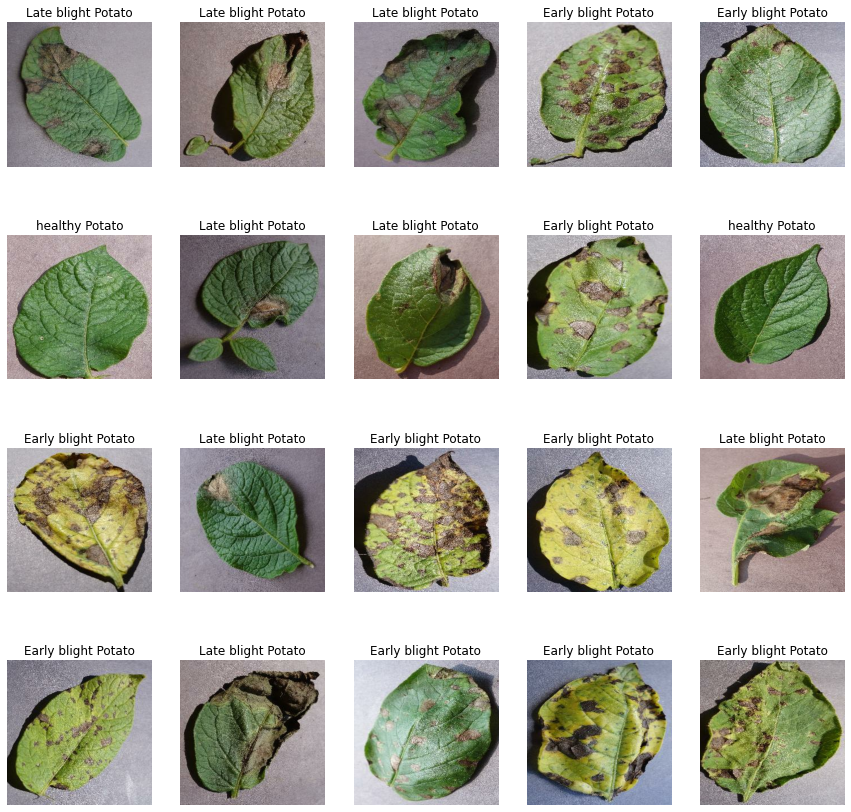

In [14]:
plt.figure(figsize= (15, 15))

for image_batch, label_batch in dataset.take(1):
    for i in range (20):
        ax = plt.subplot(4,5,i+1)
        plt.imshow(image_batch[i].numpy().astype('int'))
        plt.title(classes[label_batch[i]])
        plt.axis('off')

In [15]:
# Number of batches of Dataset
# 1 batch having 32 images

size_of_ds = len(dataset)
size_of_ds

68

In [16]:
def get_ds_split(ds, training_ds_per=0.7, val_ds_per=0.15, test_ds_per=0.15, shuffle=True, shuffle_size=1000):
    assert (training_ds_per + test_ds_per + val_ds_per) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=2)
    
    train_size = int(training_ds_per * ds_size)
    val_size = int(val_ds_per * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [17]:
training_ds, validation_ds, testing_ds = get_ds_split(dataset)

In [18]:
len(training_ds)

47

In [19]:
len(validation_ds)

10

In [20]:
len(testing_ds)

11